### Latent Dirichlet Allocation (LDA)

In [1]:
import pandas as pd
import re
import numpy as np
import nltk
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
stopwords=set(nltk.corpus.stopwords.words('english'))
from collections import defaultdict
%matplotlib inline

In [2]:
data = pd.read_csv("Data/clean_pmc.csv")#, nrows=10000)

In [3]:
data_cleaned = data[data['text'].apply(lambda x: bool(re.match('.*[a-zA-Z]+', x)))]
lang = pd.read_csv("Data/predicted_lang.csv", index_col=0).squeeze()
data_eng = data_cleaned[lang == 'en']
# reset index for use in pd.iterrows()
data_eng = data_eng.reset_index()

In [6]:
stopwords=set(nltk.corpus.stopwords.words('english'))

In [7]:
vectorizer = TfidfVectorizer(strip_accents='ascii', stop_words=stopwords)
data_vectorized = vectorizer.fit_transform(data_eng['text'])

<AxesSubplot:>

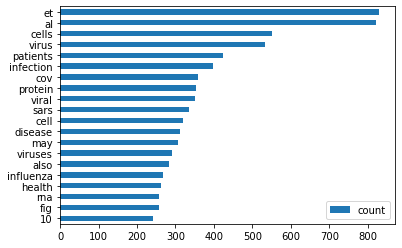

In [8]:
word_count = pd.DataFrame({'word': vectorizer.get_feature_names(), 'count': np.asarray(data_vectorized.sum(axis=0))[0]})
word_count.sort_values('count', ascending=False).set_index('word')[:20].sort_values('count', ascending=True).plot(kind='barh', xlabel='')

In [9]:
lda = LatentDirichletAllocation(n_components=5)
lda.fit(data_vectorized)

LatentDirichletAllocation(n_components=5)

In [10]:
# taken from https://www.kaggle.com/danielwolffram/topic-modeling-finding-related-articles#Latend-Dirichlet-Allocation
for topic_idx, topic in enumerate(lda.components_):
    feature_names = vectorizer.get_feature_names()
    message = f'\nTopic {topic_idx + 1}: '
    message += " ".join([feature_names[i] for i in topic.argsort()[:-5 - 1:-1]])
    print(message)


Topic 1: dukpna4 nc8 fnov sarotup tshsv

Topic 2: dcr3 nanotrap n192 cakv r190

Topic 3: mvtt drak2 binase caws pirbohp

Topic 4: et al cells virus patients

Topic 5: padpr mimicyp bw15 ncovid fcsq
